In [54]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from sewar.full_ref import mse, rmse, psnr, uqi, ssim, ergas, scc, rase, sam, msssim, vifp


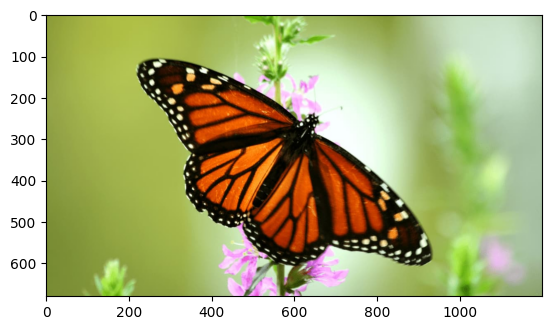

In [51]:
img = cv2.imread('butterfly.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

In [52]:
display = img.copy()


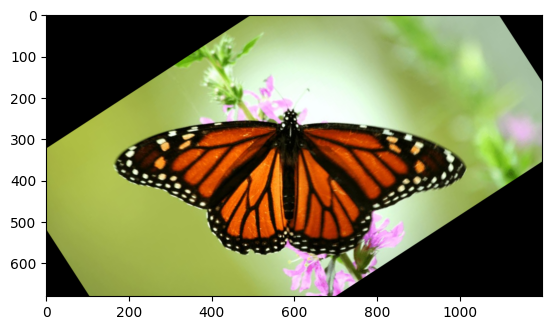

In [44]:
rotationMatrix = cv2.getRotationMatrix2D((img.shape[1]//2,img.shape[0]//2),33,1)
rotate_30 = cv2.warpAffine(img,rotationMatrix,(img.shape[1], img.shape[0])) 

plt.imshow(rotate_30)
plt.show()

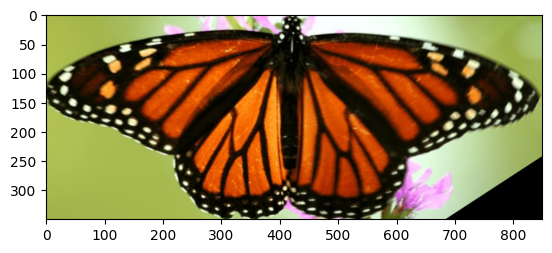

In [45]:
startPoint = (170,230)
length = (850, 350)

cropped = rotate_30[startPoint[1]:startPoint[1]+length[1], startPoint[0]:startPoint[0]+length[0]]

plt.imshow(cropped)
plt.show()

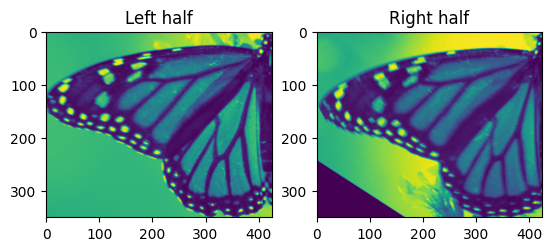

In [63]:
# Cropping right and left halves
leftHalf = cropped[:, :length[0]//2]
rightHalf = cropped[:, length[0]//2:]
# Mirroring the right side
rightHalf = cv2.flip(rightHalf, 1)

BWleft = cv2.cvtColor(leftHalf, cv2.COLOR_RGB2GRAY)
BWright = cv2.cvtColor(rightHalf, cv2.COLOR_RGB2GRAY)

# Display
_, ax = plt.subplots(1,2)
ax[0].imshow(BWleft), ax[0].set_title(f'Left half')
ax[1].imshow(BWright), ax[1].set_title(f'Right half')
plt.show()

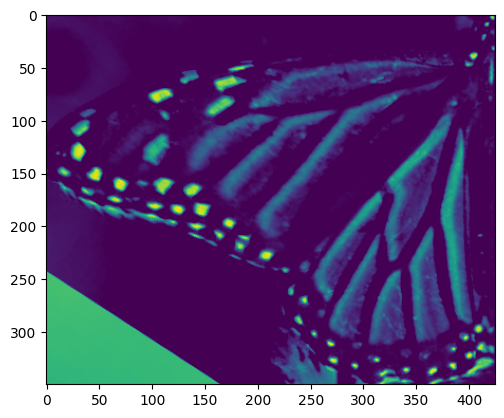

In [64]:
diff = cv2.subtract(BWleft, BWright)

plt.imshow(diff)

In [55]:
print("MSE: ", mse(leftHalf, rightHalf))
print("RMSE: ", rmse(leftHalf, rightHalf))
print("PSNR: ", psnr(leftHalf, rightHalf))
print("SSIM: ", ssim(leftHalf, rightHalf))
print("UQI: ", uqi(leftHalf, rightHalf))
print("MSSSIM: ", msssim(leftHalf, rightHalf))
print("ERGAS: ", ergas(leftHalf, rightHalf))
print("SCC: ", scc(leftHalf, rightHalf))
print("RASE: ", rase(leftHalf, rightHalf))
print("SAM: ", sam(leftHalf, rightHalf))
print("VIF: ", vifp(leftHalf, rightHalf))

MSE:  6256.104419047619
RMSE:  79.09553981766366
PSNR:  10.167763720568903
SSIM:  (0.2946342038407093, 0.3678094873791699)
UQI:  0.553700891852117
MSSSIM:  (0.2925321862094016+0j)
ERGAS:  75852.74283145311
SCC:  0.001937119459496182
RASE:  10145.464147403467
SAM:  0.6295272577126108
VIF:  0.02671486343330097
